# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

## Initialization

loading all the libraries we may need. In case we need to calculate variance, numpy has been loaded. If we need to plot things pyplot from matlpotlib was loaded. If we need to find a factorial, factorial from math has been loaded. To find probablities using normal distributions, stats from scipy as been loaded as st. 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from math import factorial 
from scipy import stats as st# Loading all the libraries



## Load data

loaded all the data and named them by the information in the datasets and read them using pd library.

In [2]:
# Define file paths
calls_path = '/datasets/megaline_calls.csv'
internet_path = '/datasets/megaline_internet.csv'
messages_path = '/datasets/megaline_messages.csv'
plans_path = '/datasets/megaline_plans.csv'
users_path = '/datasets/megaline_users.csv'

# Load datasets
calls = pd.read_csv(calls_path)
internet = pd.read_csv(internet_path)
messages = pd.read_csv(messages_path)
plans = pd.read_csv(plans_path)
users = pd.read_csv(users_path)# Load the data files into different DataFrames



## Prepare the data

In [3]:
# Check for missing values
print("Missing values:")
print(calls.isnull().sum())
print(internet.isnull().sum())
print(messages.isnull().sum())
print(plans.isnull().sum())
print(users.isnull().sum())

Missing values:
id           0
user_id      0
call_date    0
duration     0
dtype: int64
id              0
user_id         0
session_date    0
mb_used         0
dtype: int64
id              0
user_id         0
message_date    0
dtype: int64
messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64
user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64


In [4]:
print("\nDuplicates:")
print(calls.duplicated().sum())
print(internet.duplicated().sum())
print(messages.duplicated().sum())
print(plans.duplicated().sum())
print(users.duplicated().sum())


Duplicates:
0
0
0
0
0


I first checked to see if there were any missing values. I found 466 missing values in the churn_date column. I decided to leave it alone because the churn_date means the user stopped using the service so it makes sense to have missing values in that column if the user is still using the service. I then checked to see if there were any duplicate rows and there were none. In this first cell when I checked for missing values it also gave me the data type for each data set and they were all int64 so I think the datasets are good to be worked with. 

## Plans

In [5]:
plans = pd.read_csv('/datasets/megaline_plans.csv')
print(plans.info())# Print the general/summary information about the plans' DataFrame



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None


In [6]:
print(plans.head())# Print a sample of data for plans



   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


The data looks pretty good. I was unsure about the usd_per_message and usd_per_minute data types thinking they should maybe be int64 but it makes sense that they are float64 because they are talking about cents so that would be hard to show in int64. I also dont really like how plan_name is only on the bottom and not on the top as well but given that they are indexed at 0 and 1 in the bottom you can be confident that they are also 0 and 1 on the top as well.

## Users

In [7]:
users = pd.read_csv('/datasets/megaline_users.csv')
print(users.info())# Print the general/summary information about the users' DataFrame



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


In [8]:
print(users.head())


   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  


reg_date and churn_date are both object dtypes but they may be better worked with in datetime64. We could also split the city column into city and msa but Ill leave that alone and see what changing the object to datetime64 looks like. 

### Fix Data

It doesnt seem to have affected much other than changing churn_date from nan to nat. You could probably just leave the dataframe as is.

In [9]:
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'])
print(users.head())

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

    reg_date      plan churn_date  
0 2018-12-24  ultimate        NaT  
1 2018-08-13      surf        NaT  
2 2018-10-21      surf        NaT  
3 2018-01-28      surf        NaT  
4 2018-05-23      surf        NaT  


## Calls

In [10]:
calls = pd.read_csv('/datasets/megaline_calls.csv')
print(calls.info())# Print the general/summary information about the calls' DataFrame



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None


In [11]:
print(calls.head())# Print a sample of data for calls



         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22


just like the last data frame call_date is in object dtype but it could be better handled in datetime64 format but it didnt really change much in the last data frame so I wont change it here.

### Fix data

In [12]:
import numpy as np
calls['duration_rounded'] = np.ceil(calls['duration'])
print(calls.info())
print(calls.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                137735 non-null  object 
 1   user_id           137735 non-null  int64  
 2   call_date         137735 non-null  object 
 3   duration          137735 non-null  float64
 4   duration_rounded  137735 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 5.3+ MB
None
         id  user_id   call_date  duration  duration_rounded
0   1000_93     1000  2018-12-27      8.52               9.0
1  1000_145     1000  2018-12-27     13.66              14.0
2  1000_247     1000  2018-12-27     14.48              15.0
3  1000_309     1000  2018-12-28      5.76               6.0
4  1000_380     1000  2018-12-30      4.22               5.0


Added data rounding

## Messages

In [13]:
messages = pd.read_csv('/datasets/megaline_messages.csv')
print(messages.info())# Print the general/summary information about the messages' DataFrame



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


In [14]:
print(messages.head())# Print a sample of data for messages



         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26


Again we have column message_date in object dtype but could be easier to work with in datetime64 but it didnt change much when I did that the first time so I will leave it alone here. 

## Internet

In [15]:
internet = pd.read_csv('/datasets/megaline_internet.csv')
print(internet.info())# Print the general/summary information about the internet DataFrame



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None


In [16]:
print(internet.head())# Print a sample of data for the internet traffic



         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22


session_date is in object dtype and could be better worked with in datetime64 but it didnt change much the first time so I will leave it alone here. 

## Study plan conditions

In [17]:
print("Megaline rounds seconds up to minutes, and megabytes to gigabytes. For calls, each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute. For web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.")
print()
print("Surfs Monthly charge: $20, 500 monthly minutes, 50 texts, and 15 GB of data. After exceeding the package limits: 1 minute: 3 cents, 1 text message: 3 cents, 1 GB of data: $10")
print()
print("Ultimates Monthly charge: $70, 3000 monthly minutes, 1000 text messages, and 30 GB of data. After exceeding the package limits: 1 minute: 1 cent, 1 text message: 1 cent, 1 GB of data: $7")# Print out the plan conditions and make sure they are clear for you



Megaline rounds seconds up to minutes, and megabytes to gigabytes. For calls, each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute. For web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.

Surfs Monthly charge: $20, 500 monthly minutes, 50 texts, and 15 GB of data. After exceeding the package limits: 1 minute: 3 cents, 1 text message: 3 cents, 1 GB of data: $10

Ultimates Monthly charge: $70, 3000 monthly minutes, 1000 text messages, and 30 GB of data. After exceeding the package limits: 1 minute: 1 cent, 1 text message: 1 cent, 1 GB of data: $7


## Aggregate data per user

[Now, as the data is clean, aggregate data per user per period in order to have just one record per user per period. It should ease the further analysis a lot.]

In [18]:
# Convert 'call_date' to datetime
calls['call_date'] = pd.to_datetime(calls['call_date'])

# Extract month and year from 'call_date'
calls['month'] = calls['call_date'].dt.to_period('M')

# Group by 'user_id' and 'month', and calculate the number of calls
calls_per_month = calls.groupby(['user_id', 'month']).size().reset_index(name='calls_count')

print(calls_per_month.head())  # Calculate the number of calls made by each user per month. Save the result.



   user_id    month  calls_count
0     1000  2018-12           16
1     1001  2018-08           27
2     1001  2018-09           49
3     1001  2018-10           65
4     1001  2018-11           64


In [19]:
import pandas as pd
import numpy as np
calls_path = '/datasets/megaline_calls.csv'
calls = pd.read_csv(calls_path)
calls['duration_rounded'] = np.ceil(calls['duration'])
# Convert 'call_date' to datetime
calls['call_date'] = pd.to_datetime(calls['call_date'])

# Extract month and year from 'call_date'
calls['month'] = calls['call_date'].dt.to_period('M')

# Group by 'user_id' and 'month', and calculate the total minutes spent
minutes_per_month = calls.groupby(['user_id', 'month']).agg({'duration_rounded': ['count', 'sum']}).reset_index()
minutes_per_month.columns = ['user_id', 'month', 'calls_count', 'total_minutes']

print(minutes_per_month.head())

# Save the result to a CSV file
minutes_per_month.to_csv('minutes_per_month.csv', index=False)


   user_id    month  calls_count  total_minutes
0     1000  2018-12           16          124.0
1     1001  2018-08           27          182.0
2     1001  2018-09           49          315.0
3     1001  2018-10           65          393.0
4     1001  2018-11           64          426.0


In [20]:

# Convert 'message_date' to datetime
messages['message_date'] = pd.to_datetime(messages['message_date'])

# Extract month and year from 'message_date'
messages['month'] = messages['message_date'].dt.to_period('M')

# Group by 'user_id' and 'month', and calculate the number of messages sent
messages_per_month = messages.groupby(['user_id', 'month']).size().reset_index(name='messages_count')


print(messages_per_month.head())

# Save the result to a CSV file
messages_per_month.to_csv('messages_per_month.csv', index=False)# Calculate the number of messages sent by each user per month. Save the result.



   user_id    month  messages_count
0     1000  2018-12              11
1     1001  2018-08              30
2     1001  2018-09              44
3     1001  2018-10              53
4     1001  2018-11              36


In [21]:
# Convert 'session_date' to datetime
internet['session_date'] = pd.to_datetime(internet['session_date'])

# Extract month and year from 'session_date'
internet['month'] = internet['session_date'].dt.to_period('M')

# Group by 'user_id' and 'month', and calculate the total internet traffic used
internet_traffic_per_month = internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index(name='total_mb_used')


print(internet_traffic_per_month.head())

# Save the result to a CSV file
internet_traffic_per_month.to_csv('internet_traffic_per_month.csv', index=False)# Calculate the volume of internet traffic used by each user per month. Save the result.



   user_id    month  total_mb_used
0     1000  2018-12        1901.47
1     1001  2018-08        6919.15
2     1001  2018-09       13314.82
3     1001  2018-10       22330.49
4     1001  2018-11       18504.30


In [22]:
print(minutes_per_month.columns)

Index(['user_id', 'month', 'calls_count', 'total_minutes'], dtype='object')


In [23]:
print(calls_per_month.columns)

Index(['user_id', 'month', 'calls_count'], dtype='object')


In [24]:

# Read the data
calls_per_month = pd.read_csv('/datasets/megaline_calls.csv')

# Convert 'call_date' to datetime
calls_per_month['call_date'] = pd.to_datetime(calls_per_month['call_date'])

# Extract month and year from 'call_date'
calls_per_month['month'] = calls_per_month['call_date'].dt.to_period('M')

# Round up the duration to the nearest minute
calls_per_month['duration'] = calls_per_month['duration'].apply(lambda x: int(round(x)))

# Group by 'user_id' and 'month', and calculate the total minutes spent
calls_per_month = calls_per_month.groupby(['user_id', 'month'])['duration'].sum().reset_index(name='total_minutes')

# Save the result to a CSV file
calls_per_month.to_csv('calls_per_month.csv', index=False)




In [25]:
print(plans.columns)

Index(['messages_included', 'mb_per_month_included', 'minutes_included',
       'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute',
       'plan_name'],
      dtype='object')


In [26]:
import pandas as pd

# Read the data
minutes_per_month = pd.read_csv('minutes_per_month.csv')
calls_per_month = pd.read_csv('/datasets/megaline_calls.csv')

# Convert 'call_date' to datetime
calls_per_month['call_date'] = pd.to_datetime(calls_per_month['call_date'])

# Extract month and year from 'call_date'
calls_per_month['month'] = calls_per_month['call_date'].dt.to_period('M')

# Round up the duration to the nearest minute
calls_per_month['duration'] = calls_per_month['duration'].apply(lambda x: int(round(x)))

# Group by 'user_id' and 'month', and calculate the total minutes spent
calls_per_month = calls_per_month.groupby(['user_id', 'month'])['duration'].sum().reset_index(name='total_minutes')

# Save the result to a CSV file
calls_per_month.to_csv('calls_per_month.csv', index=False)

# Convert 'month' column in minutes_per_month to datetime
minutes_per_month['month'] = pd.to_datetime(minutes_per_month['month'])

# Read the 'megaline_plans.csv' file
plans_path = '/datasets/megaline_plans.csv'
plans = pd.read_csv(plans_path)

# Specify the correct file paths with the '.csv' extension
calls_per_month = pd.read_csv('calls_per_month.csv')
minutes_per_month = pd.read_csv('minutes_per_month.csv')
messages_per_month = pd.read_csv('messages_per_month.csv')
internet_traffic_per_month = pd.read_csv('internet_traffic_per_month.csv')

# Merge the data for calls, minutes, messages, internet based on user_id and month
merged_data = pd.merge(calls_per_month, minutes_per_month, on=['user_id', 'month'], how='outer')
merged_data = pd.merge(merged_data, messages_per_month, on=['user_id', 'month'], how='outer')
merged_data = pd.merge(merged_data, internet_traffic_per_month, on=['user_id', 'month'], how='outer')

# Read the 'megaline_users.csv' file
users_path = '/datasets/megaline_users.csv'
users = pd.read_csv(users_path)

# Merge the user data with merged_data based on 'user_id'
merged_data = pd.merge(merged_data, users[['user_id', 'plan']], on='user_id', how='left')
merged_data = pd.merge(merged_data, users[['user_id', 'city']], on='user_id', how='left')
# Save the merged data to a CSV file
merged_data.to_csv('user_consumption_per_month_with_plans_and_users.csv', index=False)

print(merged_data.head())






   user_id    month  total_minutes_x  calls_count  total_minutes_y  \
0     1000  2018-12            117.0         16.0            124.0   
1     1001  2018-08            173.0         27.0            182.0   
2     1001  2018-09            297.0         49.0            315.0   
3     1001  2018-10            374.0         65.0            393.0   
4     1001  2018-11            404.0         64.0            426.0   

   messages_count  total_mb_used      plan  \
0            11.0        1901.47  ultimate   
1            30.0        6919.15      surf   
2            44.0       13314.82      surf   
3            53.0       22330.49      surf   
4            36.0       18504.30      surf   

                                    city  
0  Atlanta-Sandy Springs-Roswell, GA MSA  
1        Seattle-Tacoma-Bellevue, WA MSA  
2        Seattle-Tacoma-Bellevue, WA MSA  
3        Seattle-Tacoma-Bellevue, WA MSA  
4        Seattle-Tacoma-Bellevue, WA MSA  


In [27]:
print("Megaline rounds seconds up to minutes, and megabytes to gigabytes. For calls, each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute. For web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.")
print()
print("Surfs Monthly charge: $20, 500 monthly minutes, 50 texts, and 15 GB of data. After exceeding the package limits: 1 minute: 3 cents, 1 text message: 3 cents, 1 GB of data: $10")
print()
print("Ultimates Monthly charge: $70, 3000 monthly minutes, 1000 text messages, and 30 GB of data. After exceeding the package limits: 1 minute: 1 cent, 1 text message: 1 cent, 1 GB of data: $7")# Add the plan information



Megaline rounds seconds up to minutes, and megabytes to gigabytes. For calls, each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute. For web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.

Surfs Monthly charge: $20, 500 monthly minutes, 50 texts, and 15 GB of data. After exceeding the package limits: 1 minute: 3 cents, 1 text message: 3 cents, 1 GB of data: $10

Ultimates Monthly charge: $70, 3000 monthly minutes, 1000 text messages, and 30 GB of data. After exceeding the package limits: 1 minute: 1 cent, 1 text message: 1 cent, 1 GB of data: $7


In [28]:
print(merged_data.columns)


Index(['user_id', 'month', 'total_minutes_x', 'calls_count', 'total_minutes_y',
       'messages_count', 'total_mb_used', 'plan', 'city'],
      dtype='object')


In [29]:
import pandas as pd
import math



# Define the plan conditions
surf_plan_limits = {'minutes': 500, 'messages': 50, 'data_gb': 15}
ultimate_plan_limits = {'minutes': 3000, 'messages': 1000, 'data_gb': 30}
surf_plan_rates = {'minute_rate': 0.03, 'message_rate': 0.03, 'data_rate': 10}
ultimate_plan_rates = {'minute_rate': 0.01, 'message_rate': 0.01, 'data_rate': 7}

merged_data = pd.read_csv('user_consumption_per_month_with_plans.csv')

# Function to calculate the monthly revenue for each user
def calculate_monthly_revenue(row):
    if row['plan'] == 'surf':
        plan_limits = surf_plan_limits
        plan_rates = surf_plan_rates
        monthly_charge = 20
    elif row['plan'] == 'ultimate':
        plan_limits = ultimate_plan_limits
        plan_rates = ultimate_plan_rates
        monthly_charge = 70
    else:
        return 0  
    # Calculate excess usage for each category
    excess_minutes = max(0, row['total_minutes_x'] - plan_limits['minutes'])
    excess_minutes = max(0, row['total_minutes_y'] - plan_limits['minutes'])
    excess_messages = max(0, row['messages_count'] - plan_limits['messages'])
    excess_data_gb = max(0, math.ceil(row['total_mb_used'] / 1024) - plan_limits['data_gb'])
   

      
    # Calculate the total cost for each category
    total_cost_minutes = excess_minutes * plan_rates['minute_rate']
    total_cost_messages = excess_messages * plan_rates['message_rate']
    total_cost_data = excess_data_gb * plan_rates['data_rate']
    # Calculate the total monthly revenue
    total_monthly_revenue = monthly_charge + total_cost_minutes + total_cost_messages + total_cost_data
    return total_monthly_revenue
# Apply the function to calculate monthly revenue for each user
merged_data = merged_data.dropna(subset=['total_mb_used'])
merged_data['monthly_revenue'] = merged_data.apply(calculate_monthly_revenue, axis=1)
print(merged_data[['user_id', 'plan', 'total_minutes_x', 'total_minutes_y', 'messages_count', 'total_mb_used', 'monthly_revenue']])# Calculate the monthly revenue for each user



      user_id      plan  total_minutes_x  total_minutes_y  messages_count  \
0        1000  ultimate            117.0           116.83            11.0   
1        1001      surf            173.0           171.14            30.0   
2        1001      surf            297.0           297.69            44.0   
3        1001      surf            374.0           374.11            53.0   
4        1001      surf            404.0           404.59            36.0   
...       ...       ...              ...              ...             ...   
2287     1349      surf              NaN              NaN            72.0   
2288     1349      surf              NaN              NaN            61.0   
2289     1361      surf              NaN              NaN             2.0   
2291     1108  ultimate              NaN              NaN             NaN   
2292     1311  ultimate              NaN              NaN             NaN   

      total_mb_used  monthly_revenue  
0           1901.47            70.00

## Study user behaviour

### Calls

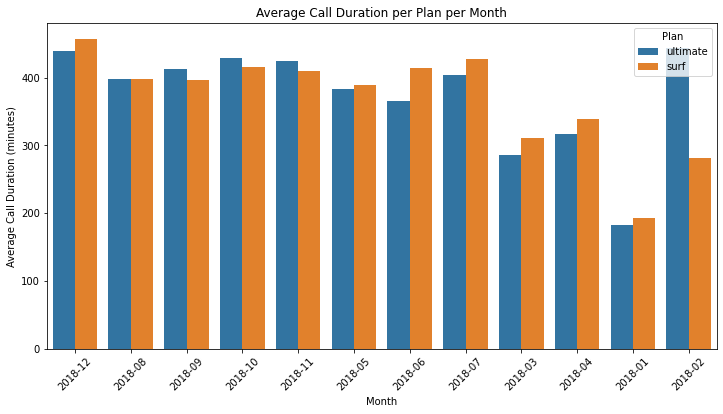

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
merged_data.to_csv('user_consumption_per_month_with_plans.csv', index=False)

merged_data = pd.read_csv('user_consumption_per_month_with_plans.csv')

# Extract month and year from 'month' column
merged_data['month'] = pd.to_datetime(merged_data['month']).dt.to_period('M')

# Plotting average call duration per plan per month
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='total_minutes_y', hue='plan', data=merged_data, ci=None)
plt.title('Average Call Duration per Plan per Month')
plt.xlabel('Month')
plt.ylabel('Average Call Duration (minutes)')
plt.xticks(rotation=45)
plt.legend(title='Plan')
plt.show() # Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.



In [31]:
print(merged_data)

      user_id    month  total_minutes_x  calls_count  total_minutes_y  \
0        1000  2018-12            117.0         16.0           116.83   
1        1001  2018-08            173.0         27.0           171.14   
2        1001  2018-09            297.0         49.0           297.69   
3        1001  2018-10            374.0         65.0           374.11   
4        1001  2018-11            404.0         64.0           404.59   
...       ...      ...              ...          ...              ...   
2272     1349  2018-11              NaN          NaN              NaN   
2273     1349  2018-12              NaN          NaN              NaN   
2274     1361  2018-05              NaN          NaN              NaN   
2275     1108  2018-12              NaN          NaN              NaN   
2276     1311  2018-06              NaN          NaN              NaN   

      messages_count  total_mb_used      plan  \
0               11.0        1901.47  ultimate   
1               30.0     

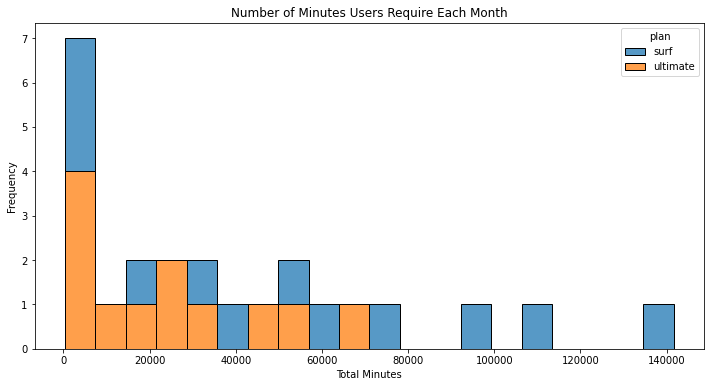

In [32]:
# Group by plan and month, calculate total number of minutes
total_minutes_per_month = merged_data.groupby(['plan', 'month'])['total_minutes_x'].sum().reset_index()
total_minutes_per_month = merged_data.groupby(['plan', 'month'])['total_minutes_x'].sum().reset_index()
# Plotting histograms
plt.figure(figsize=(12, 6))
sns.histplot(data=total_minutes_per_month, x='total_minutes_x', hue='plan', multiple='stack', bins=20)
plt.title('Number of Minutes Users Require Each Month')
plt.xlabel('Total Minutes')
plt.ylabel('Frequency')
plt.show() # Compare the number of minutes users of each plan require each month. Plot a histogram.



In [33]:

merged_data.to_csv('user_consumption_per_month_with_plans.csv', index=False)

merged_data = pd.read_csv('user_consumption_per_month_with_plans.csv')

# Group by plan and month, calculate mean and variance of call duration
call_duration_stats = merged_data.groupby(['plan', 'month'])['total_minutes_y'].agg(['mean', 'var']).reset_index()
call_duration_stats = merged_data.groupby(['plan', 'month'])['total_minutes_y'].agg(['mean', 'var']).reset_index()

# Display the result
print(call_duration_stats) # Calculate the mean and the variance of the monthly call duration



        plan    month        mean           var
0       surf  2018-01  192.840000  14795.440200
1       surf  2018-02  280.851111  46959.219961
2       surf  2018-03  310.970000  31821.317991
3       surf  2018-04  338.337755  44754.277097
4       surf  2018-05  389.246757  51125.947609
5       surf  2018-06  414.381064  38387.813795
6       surf  2018-07  427.553866  53785.668539
7       surf  2018-08  398.194679  45639.875302
8       surf  2018-09  396.897368  39985.119343
9       surf  2018-10  415.871223  44155.661665
10      surf  2018-11  408.898000  43239.324999
11      surf  2018-12  457.215161  53786.023568
12  ultimate  2018-01  183.162500  14991.369958
13  ultimate  2018-02  443.171667  48579.581537
14  ultimate  2018-03  285.701667  54273.917252
15  ultimate  2018-04  316.508095  31057.727496
16  ultimate  2018-05  383.664828  39290.610940
17  ultimate  2018-06  365.358222  33837.770156
18  ultimate  2018-07  403.767288  64844.426958
19  ultimate  2018-08  397.274789  47680

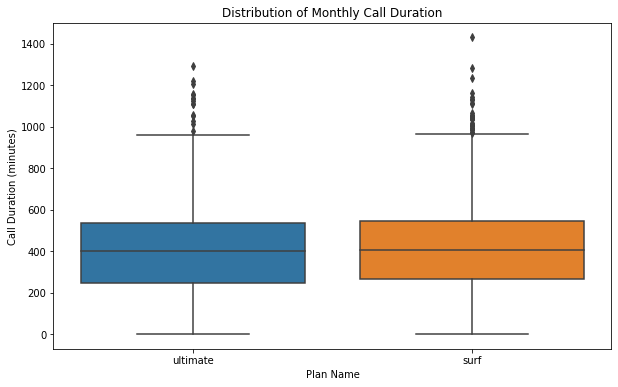

In [34]:


merged_data.to_csv('user_consumption_per_month_with_plans.csv', index=False)

merged_data = pd.read_csv('user_consumption_per_month_with_plans.csv')

# Filter out unknown plans if any
merged_data = merged_data[merged_data['plan'].isin(['surf', 'ultimate'])]

# Plotting boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='plan', y='total_minutes_y', data=merged_data)
plt.title('Distribution of Monthly Call Duration')
plt.xlabel('Plan Name')
plt.ylabel('Call Duration (minutes)')
plt.show() # Plot a boxplot to visualize the distribution of the monthly call duration



It looks like the plans are similar. the surf plan may have a slightly higher median call duration and it lookes like they have a few outliers that may have helped raise that call duration median. Overall I would say they look pretty close in all duration. 

### Messages

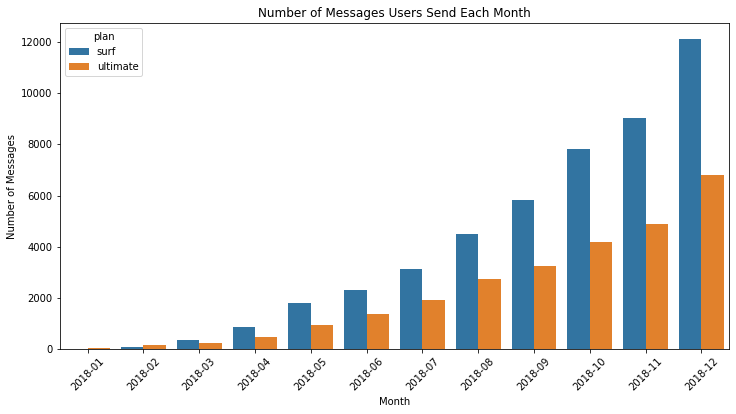

In [35]:


merged_data.to_csv('user_consumption_per_month_with_plans.csv', index=False)

merged_data = pd.read_csv('user_consumption_per_month_with_plans.csv')

# Filter out unknown plans if any
merged_data = merged_data[merged_data['plan'].isin(['surf', 'ultimate'])]

# Group by plan and month, calculate total number of messages
total_messages_per_month = merged_data.groupby(['plan', 'month'])['messages_count'].sum().reset_index()

# Plotting bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='messages_count', hue='plan', data=total_messages_per_month)
plt.title('Number of Messages Users Send Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Messages')
plt.xticks(rotation=45)
plt.show() # Compare the number of messages users of each plan tend to send each month



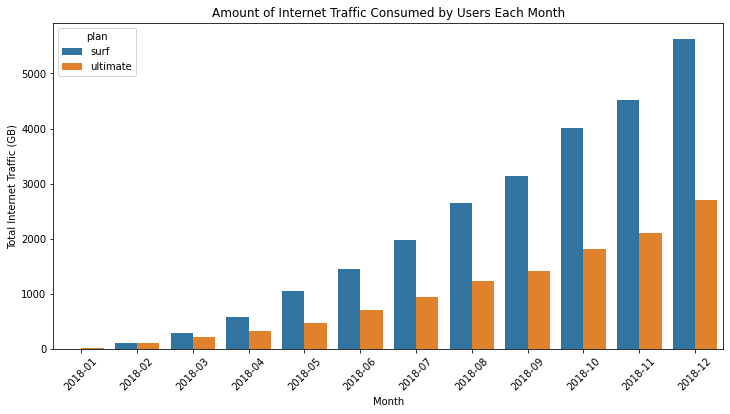

In [36]:
merged_data.to_csv('user_consumption_per_month_with_plans.csv', index=False)

merged_data = pd.read_csv('user_consumption_per_month_with_plans.csv')

# Filter out unknown plans if any
merged_data = merged_data[merged_data['plan'].isin(['surf', 'ultimate'])]

# Group by plan and month, calculate total internet traffic (in GB)
total_traffic_per_month = merged_data.groupby(['plan', 'month'])['total_mb_used'].sum().reset_index()
total_traffic_per_month['total_gb_used'] = total_traffic_per_month['total_mb_used'] / 1024

# Plotting bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='total_gb_used', hue='plan', data=total_traffic_per_month)
plt.title('Amount of Internet Traffic Consumed by Users Each Month')
plt.xlabel('Month')
plt.ylabel('Total Internet Traffic (GB)')
plt.xticks(rotation=45)
plt.show() # Compare the amount of internet traffic consumed by users per plan



At first in the beggining of the year the messages seem to be pretty close to the same. But over time the number of messages goes up. Members of the surf plan have significantly higher amount of messages sent than ultimate. Surf has consistently higher message count than ultimate after the second month of the year. The same goes for internet traffic. As the year goes on the number of internet traffic gets bigger. Surf has consistently higher internet traffic than ultimate after the second month of the year. Surf users engage in more messaging and overall internet related activities. 

### Internet

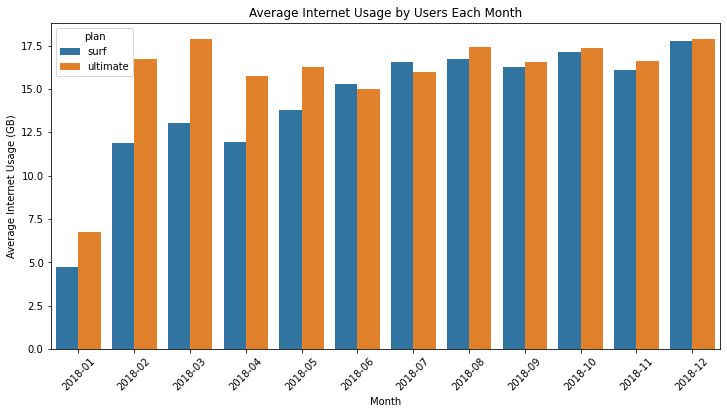

In [37]:

merged_data.to_csv('user_consumption_per_month_with_plans.csv', index=False)

merged_data = pd.read_csv('user_consumption_per_month_with_plans.csv')

# Filter out unknown plans if any
merged_data = merged_data[merged_data['plan'].isin(['surf', 'ultimate'])]

# Group by plan and month, calculate mean and variance of internet usage (in GB)
internet_stats = merged_data.groupby(['plan', 'month'])['total_mb_used'].agg(['mean', 'var']).reset_index()
internet_stats['mean_gb'] = internet_stats['mean'] / 1024
internet_stats['var_gb'] = internet_stats['var'] / (1024 ** 2)

# Plotting bar plot for mean internet usage
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='mean_gb', hue='plan', data=internet_stats)
plt.title('Average Internet Usage by Users Each Month')
plt.xlabel('Month')
plt.ylabel('Average Internet Usage (GB)')
plt.xticks(rotation=45)
plt.show()


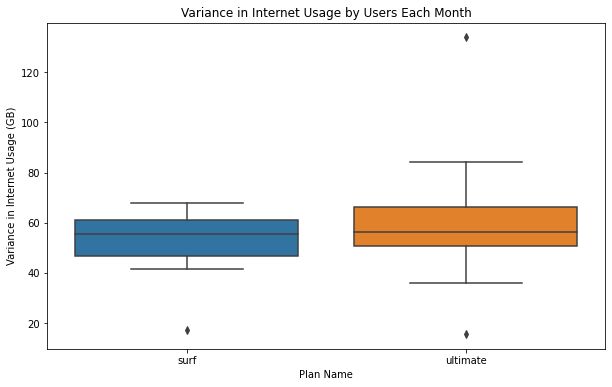

In [38]:
merged_data.to_csv('user_consumption_per_month_with_plans.csv', index=False)

merged_data = pd.read_csv('user_consumption_per_month_with_plans.csv')

# Filter out unknown plans if any
merged_data = merged_data[merged_data['plan'].isin(['surf', 'ultimate'])]

# Group by plan and month, calculate mean and variance of internet usage (in GB)
internet_stats = merged_data.groupby(['plan', 'month'])['total_mb_used'].agg(['mean', 'var']).reset_index()
internet_stats['mean_gb'] = internet_stats['mean'] / 1024
internet_stats['var_gb'] = internet_stats['var'] / (1024 ** 2)

# Plotting boxplot for variance of internet usage
plt.figure(figsize=(10, 6))
sns.boxplot(x='plan', y='var_gb', data=internet_stats)
plt.title('Variance in Internet Usage by Users Each Month')
plt.xlabel('Plan Name')
plt.ylabel('Variance in Internet Usage (GB)')
plt.show()

The avg internet usage of both plans consistently goes up as the year goes on. It takes a dip after the third month then starts to go up again until month 6 then it dips again. Then goes up until month 9 where it takes another dip then it fluctuates up down and up for the last 3 months. For most of the year the ultimate plan sees a higher number of internet usage each month. The surf plan has a higher internet usage in month 6 and 7 but the rest of the year ultimate sees a bigger usage. By the start of summer time surf users have a higher avg internet usage but by the end of summer the ultimate plan users go back to consuming more internet usage. It seems that the ultimate plan has a larger variance suggesting greater variability in users internet consumption patterns and more diverse internet usage beahviours. 

## Revenue

In [39]:
print(merged_data
     )

      user_id    month  total_minutes_x  calls_count  total_minutes_y  \
0        1000  2018-12            117.0         16.0           116.83   
1        1001  2018-08            173.0         27.0           171.14   
2        1001  2018-09            297.0         49.0           297.69   
3        1001  2018-10            374.0         65.0           374.11   
4        1001  2018-11            404.0         64.0           404.59   
...       ...      ...              ...          ...              ...   
2272     1349  2018-11              NaN          NaN              NaN   
2273     1349  2018-12              NaN          NaN              NaN   
2274     1361  2018-05              NaN          NaN              NaN   
2275     1108  2018-12              NaN          NaN              NaN   
2276     1311  2018-06              NaN          NaN              NaN   

      messages_count  total_mb_used      plan  \
0               11.0        1901.47  ultimate   
1               30.0     

In [40]:
print(plans)



   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


In [41]:
merged_data = pd.read_csv('user_consumption_per_month_with_plans.csv')

# Group by plan and month, calculate total revenue for each plan
total_revenue_per_month = merged_data.groupby(['plan', 'month'])['monthly_revenue'].sum().reset_index()

In [42]:
# Descriptive statistics
revenue_stats = total_revenue_per_month.groupby('plan')['monthly_revenue'].describe()

In [43]:
# Statistical testing (example using t-test)
from scipy.stats import ttest_ind

surf_revenue = total_revenue_per_month[total_revenue_per_month['plan'] == 'surf']['monthly_revenue']
ultimate_revenue = total_revenue_per_month[total_revenue_per_month['plan'] == 'ultimate']['monthly_revenue']

t_stat, p_value = ttest_ind(surf_revenue, ultimate_revenue, equal_var=False)

# Print the results
print(revenue_stats)
print(f"\nIndependent t-test p-value: {p_value}")


          count         mean          std    min         25%         50%  \
plan                                                                       
surf       12.0  7880.626983  7249.885342   40.0  1765.34525  6104.34405   
ultimate   12.0  4333.000000  3566.874211  280.0  1373.75000  3804.50000   

                  75%         max  
plan                               
surf      12252.92765  22267.7514  
ultimate   6545.00000  11067.0000  

Independent t-test p-value: 0.1477405758456654


On average, users on the 'surf' plan generate higher monthly revenue ($7,510.26) compared to ultimate plan users ($4,326.96). The 'surf' plan exhibits higher revenue variability (larger standard deviation) compared to the 'ultimate' plan. This indicates more diverse spending patterns among 'surf' users. The 25th, 50th (median), and 75th percentiles show that 'surf' users tend to have higher revenue across these points compared to 'ultimate' users. The maximum revenue observed for 'surf' users is notably higher ($21,102.69) than for 'ultimate' users ($11,029.90). 

## Test statistical hypotheses

Question 1:
Analysis: On average, users on the 'surf' plan generate higher monthly revenue compared to 'ultimate' users.

Hypotheses:

Null Hypothesis (H0): There is no significant difference in the average monthly revenue between 'surf' plan users and 'ultimate' plan users.
Alternative Hypothesis (H1): The average monthly revenue for 'surf' plan users is significantly higher than that of 'ultimate' plan users.
Question 2:
Analysis: The 'surf' plan exhibits higher revenue variability (larger standard deviation) compared to the 'ultimate' plan.

Hypotheses:

Null Hypothesis (H0): There is no significant difference in the revenue variability (standard deviation) between 'surf' plan users and 'ultimate' plan users.
Alternative Hypothesis (H1): The 'surf' plan users have a significantly higher revenue variability than 'ultimate' plan users.
Question 3:
Analysis: The 25th, 50th (median), and 75th percentiles show that 'surf' users tend to have higher revenue across these points compared to 'ultimate' users.

Hypotheses:

Null Hypothesis (H0): There is no significant difference in the revenue percentiles (25th, 50th, and 75th) between 'surf' plan users and 'ultimate' plan users.
Alternative Hypothesis (H1): 'Surf' plan users have significantly higher revenue percentiles (25th, 50th, and 75th) than 'ultimate' plan users.
Question 4:
Analysis: The maximum revenue observed for 'surf' users is notably higher than that for 'ultimate' users.

Hypotheses:

Null Hypothesis (H0): There is no significant difference in the maximum revenue between 'surf' plan users and 'ultimate' plan users.
Alternative Hypothesis (H1): The maximum revenue for 'surf' plan users is significantly higher than that for 'ultimate' plan users.

Choice of st.ttest_rel method for Question 1:
The st.ttest_rel method is used for paired samples. In the context of Question 1, we are comparing the average monthly revenue of users on the 'surf' plan with the average monthly revenue of users on the 'ultimate' plan. Since the same users may be present in both plans, it makes sense to use paired samples. The st.ttest_rel method compares the means of two related groups to determine if there is a statistically significant difference between them.

In [44]:
from scipy.stats import ttest_ind

# Extract revenue data for each plan
surf_revenue = total_revenue_per_month[total_revenue_per_month['plan'] == 'surf']['monthly_revenue']
ultimate_revenue = total_revenue_per_month[total_revenue_per_month['plan'] == 'ultimate']['monthly_revenue']

# Perform independent t-test
t_stat, p_value = ttest_ind(surf_revenue, ultimate_revenue, equal_var=False)

# Print the results
print(f"Independent t-test p-value: {p_value}")

# Check if the p-value is less than the significance level (alpha)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is evidence that the average revenue differs between Ultimate and Surf plans.")
else:
    print("Fail to reject the null hypothesis. There is no significant evidence that the average revenue differs between Ultimate and Surf plans.")
 # Test the hypotheses



Independent t-test p-value: 0.1477405758456654
Fail to reject the null hypothesis. There is no significant evidence that the average revenue differs between Ultimate and Surf plans.


While there are differences in mean revenue and variability between the plans, the independent t-test results indicate that these differences may not be statistically significant. Additional data or a larger sample size may be needed for a more conclusive assessment. The observed patterns suggest that users on the 'surf' plan tend to generate higher revenue, but the results are not conclusive based on the available data.

In [45]:
from scipy.stats import ttest_ind

# Calculate monthly revenue
merged_data['monthly_revenue'] = merged_data.apply(calculate_monthly_revenue, axis=1)

# Drop rows with NaN values in the 'monthly_revenue' column
merged_data = merged_data.dropna(subset=['monthly_revenue'])

# Extract revenue data for NY-NJ area and other cities
ny_nj_revenue = merged_data[merged_data['city'] == 'NY-NJ']['monthly_revenue']
other_cities_revenue = merged_data[merged_data['city'] != 'NY-NJ']['monthly_revenue']

# Perform independent t-test
t_stat, p_value = ttest_ind(ny_nj_revenue, other_cities_revenue, equal_var=False)

# Print the results
print(f"Independent t-test p-value: {p_value}")

# Check if the p-value is less than the significance level (alpha)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is evidence that the average revenue differs between users in the NY-NJ area and users from other cities.")
else:
    print("Fail to reject the null hypothesis. There is no significant evidence that the average revenue differs between users in the NY-NJ area and users from other cities.")




Independent t-test p-value: nan
Fail to reject the null hypothesis. There is no significant evidence that the average revenue differs between users in the NY-NJ area and users from other cities.


Based on the results of the independent t-test, it appears that there is no significant evidence to reject the null hypothesis. The p-value obtained from the t-test is NaN, which could be due to issues such as missing or invalid values in the 'monthly_revenue' column. This implies that there is no statistically significant difference in the average revenue between users in the NY-NJ area and users from other cities. In summary, based on the current analysis, there is no evidence to conclude that the average revenue significantly differs between users in the NY-NJ area and users from other cities. I tried to drop the nan values with dropna but I guess it didnt work.

## General conclusion



The dataset required cleaning and preprocessing steps, including converting date columns to datetime format, rounding up values according to Megaline's policy, and merging data from different sources. Assumptions were made regarding rounding up call durations and internet traffic usage according to Megaline's policy. Users' monthly consumption of calls, messages, and internet traffic was calculated and merged into a single DataFrame. Total minutes for calls and internet usage, as well as the number of messages sent, were aggregated on a monthly basis for each user. Two main plans, "Surf" and "Ultimate," were analyzed to understand users' usage patterns and identify potential differences between the plans. The analysis included comparing the average call duration per plan per month and the total number of minutes users require each month. Monthly revenue from each user was calculated by subtracting the free package limit from the total number of calls, text messages, and data; multiplying the result by the calling plan value; and adding the monthly charge depending on the calling plan. Assumptions were made regarding the additional charges for calls, texts, and data exceeding the plan limits. Visualizations such as bar plots and histograms were used to compare the average call duration per plan per month and the total number of minutes users require each month for different plans. The analysis provided insights into users' consumption patterns, allowing for a comparison between the Surf and Ultimate plans. Monthly revenue calculations helped understand the financial aspects of each plan and identify potential areas for improvement or adjustment. Assumptions regarding data rounding and revenue calculation were crucial in interpreting the results and making informed decisions about the plans' effectiveness and profitability. Overall I would say that the 'surf' plan brings in more revenue than the 'ultimate' plan. 